# Tennis Ace Project Using Multiple Linear Regression

## Introduction

### Background

**Multiple Linear Regression** uses two or more independent variables to predict the values of a dependent variable. It is based on the following equation:
$$y = b + m_1x_1 + m_2x_2 + ... + m_nx_n$$

In predicting the dependent variable, the relationship between some independent variables and the dependent variable are more important than others. 

### Problem

A lot goes into determining a world class athlete, especially what goes on during the game. Tennis, is no exception as it demands a lot of speed, agility and stamina. A player's statistics during the game goes a long way to determine whether he wins or loses, but which statistics in particular actually determine the outcome of the game?

### Objective

By analyzing and modeling the Association of Tennis Professionals (ATP) data, this project will determine what it takes to be one of the best tennis players in the world. This project therefore seeks to:

1. Predict the winnigs of a tennis player based on his statistics during the game

2. Determine which combination of the player's statistics during the game has a high influence on his winnings

### Dataset

The dataset for this project is provided in tennis_stats.csv and originates from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

### Identifying Data
**Player**: name of the tennis player <br>
**Year**: year data was recorded 


### Service Game Columns (Offensive) 
**Aces: number of serves by the player where the receiver does not touch the ball <br>
**DoubleFaults**: number of times player missed both first and second serve attempts <br>
**FirstServe**: % of first-serve attempts made <br>
**FirstServePointsWon**: % of first-serve attempt points won by the player <br>
**SecondServePointsWon**: % of second-serve attempt points won by the player <br>
**BreakPointsFaced**: number of times where the receiver could have won service game of the player <br>
**BreakPointsSaved**: % of the time the player was able to stop the receiver from winning service game when they had the chance <br>
**ServiceGamesPlayed**: total number of games where the player served <br>
**ServiceGamesWon**: total number of games where the player served and won <br>
**TotalServicePointsWon**: % of points in games where the player served that they won <br>

### Return Game Columns (Defensive)
**FirstServeReturnPointsWon**: % of opponents first-serve points the player was able to win <br>
**SecondServeReturnPointsWon**: % of opponents second-serve points the player was able to win <br>
**BreakPointsOpportunities**: number of times where the player could have won the service game of the opponent <br>
**BreakPointsConverted**: % of the time the player was able to win their opponent’s service game when they had the chance <br>
**ReturnGamesPlayed**: total number of games where the player’s opponent served <br>
**ReturnGamesWon**: total number of games where the player’s opponent served and the player won <br>
**ReturnPointsWon**: total number of points where the player’s opponent served and the player won <br>
**TotalPointsWon**: % of points won by the player <br>

### Outcomes
**Wins**: number of matches won in a year <br>
**Losses**: number of matches lost in a year <br>
**Winnings**: total winnings in USD($) in a year <br>
**Ranking**: ranking at the end of year <br>

### Importing Libraries

We import the packages that we need to complete the project.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
from IPython.display import Markdown as md

### Reading csv file

Read and inspect a sample of the data

In [2]:
# Read and inspect data
tennis = pd.read_csv('tennis_stats.csv')
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


### Exploratory Data Analysis 

Perform a graphical exploratory data analysis on the dataset to uncover underlying trends in the data. We plot different features against different outcomes to find the relationships between them.

#### Graphical EDA of Defensive Features against Outcomes

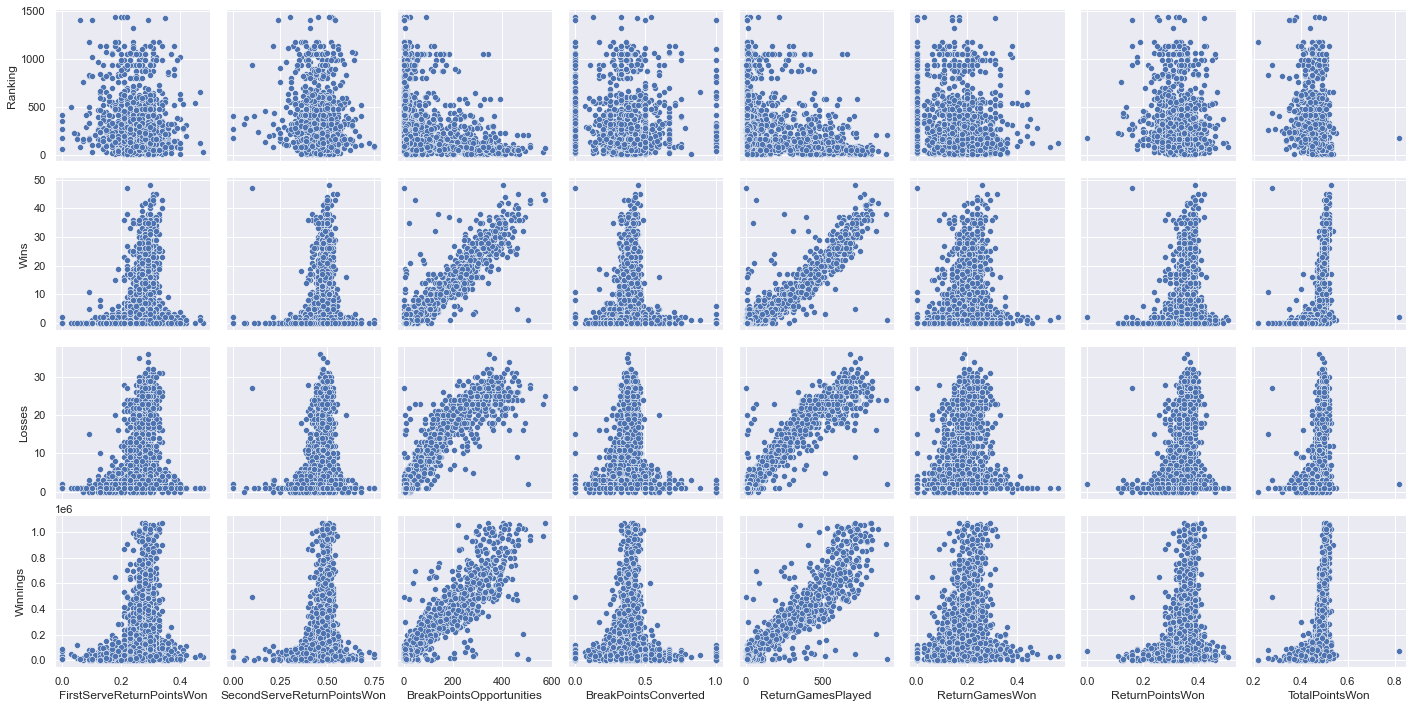

In [3]:
# Graphical EDA of Defensive features against Outcomes using Seaborn's Pairplot
sns.set()
sns.pairplot(tennis, 
             x_vars=['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 
                     'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon'],
            y_vars=[ 'Ranking', 'Wins', 'Losses', 'Winnings'])

From visual inspection of the plot, two defensive features standout in having a susbstantial effect on the outcomes. These are **Break Points Opportunites** and **Return Games Played**

#### Graphical EDA of Offensive Features against Outcomes

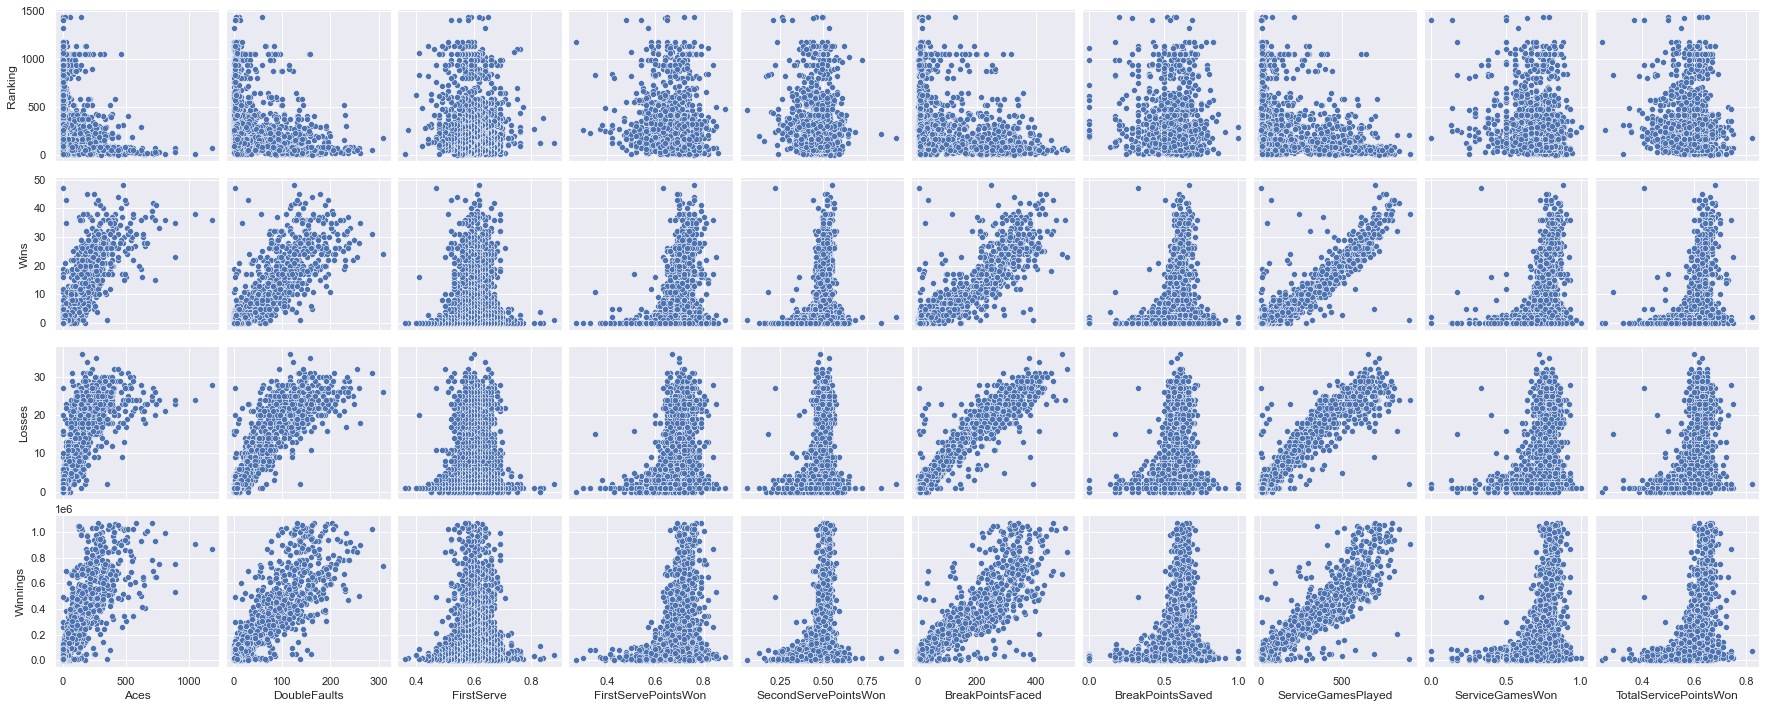

In [4]:
# Graphical EDA of Offensive features against Outcomes using Seaborn's Pairplot
sns.pairplot(tennis, 
             x_vars=['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 
                     'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon'],
            y_vars=['Ranking', 'Wins', 'Losses', 'Winnings'])

From visual inspection of the plot, four offensive features standout in having a susbstantial effect on the outcomes. These are **Aces**, **Double Faults**, **Break Points Faced**,  and **Service Games Played**

In [5]:
# Viewing features with high correlation against outcome statistics(Wins, Losses, Winnings, Ranking)
tennis_corr = tennis.corr()[(tennis.corr() > 0.7) & (tennis.corr() < 0.99)]
tennis_corr = tennis_corr.loc[['Wins', 'Losses', 'Winnings']]
tennis_corr.drop(columns = ['Wins', 'Losses', 'Winnings'], inplace = True)
tennis_corr.dropna(axis = 1, how = 'all', inplace = True)
tennis_corr

,Aces,BreakPointsFaced,BreakPointsOpportunities,DoubleFaults,ReturnGamesPlayed,ServiceGamesPlayed
Wins,0.825301,0.883470,0.923453,0.847459,0.928408,0.929153
Losses,0.768628,0.943309,0.909295,0.881922,0.936755,0.935182
Winnings,0.798404,0.876036,0.900444,0.854685,0.912613,0.912985


We then compute the correlation co-efficients for the features selected against the outcomes. From the plots, none of the features had any correlation with **Ranking** hence that outcome was dropped. The **Winnings** outcome was then selected to be used

In [6]:
# Features that affect winnings
features_winnings = tennis_corr.columns.to_list()
features_winnings

['Aces',
 'BreakPointsFaced',
 'BreakPointsOpportunities',
 'DoubleFaults',
 'ReturnGamesPlayed',
 'ServiceGamesPlayed']

### Single Feature to predict Winnings

In [7]:
# Function that creates a model that uses a single feature to predict winnings
def single_feature(df, feature_list):
    test_scores = []
    for feature in feature_list:
        x = df[[feature]]
        y = df[['Winnings']]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
        model = LinearRegression()
        model.fit(X_train, y_train)
        print(f'Train Score for {feature}:{model.score(X_train, y_train)}')
        print(f'Test Score for {feature}: {model.score(X_test, y_test)}')
        test_scores.append(model.score(X_test, y_test))
        y_predict = model.predict(X_test)
    return test_scores

In [8]:
scores = single_feature(tennis, features_winnings)

Train Score for Aces:0.636852757556633
Test Score for Aces: 0.6383837310570932
Train Score for BreakPointsFaced:0.7608884307089544
Test Score for BreakPointsFaced: 0.790618018600669
Train Score for BreakPointsOpportunities:0.8002360448249353
Test Score for BreakPointsOpportunities: 0.849583922858522
Train Score for DoubleFaults:0.7251956340744465
Test Score for DoubleFaults: 0.7498615744269678
Train Score for ReturnGamesPlayed:0.8263572749081349
Test Score for ReturnGamesPlayed: 0.8569391760991623
Train Score for ServiceGamesPlayed:0.8269259866766102
Test Score for ServiceGamesPlayed: 0.8580241697657691


In [9]:
max_score = max(scores)
max_score

0.8580241697657691

### Visualize Test Scores

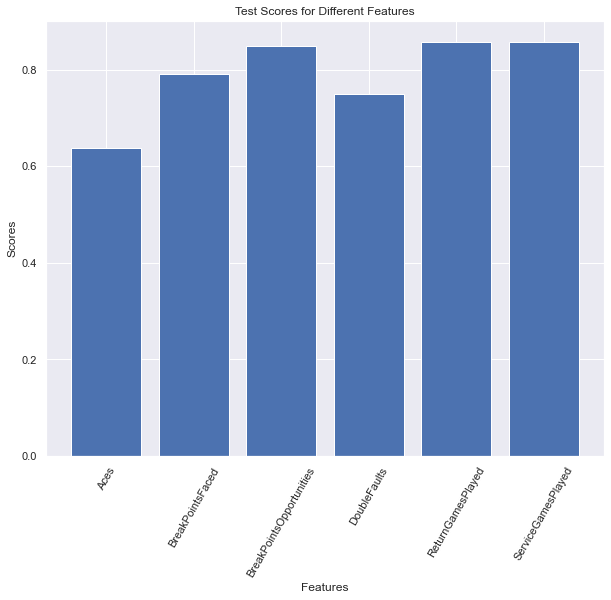

In [10]:
sns.set()
plt.figure(figsize=(10, 8))
x = [i for i in range(len(features_winnings))]
plt.bar(x, scores, tick_label = features_winnings)
plt.xticks(rotation=60)
plt.title('Test Scores for Different Features')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

The highest test score obtained when a single feature was used in predicting Winnings was **0.858** and the feature responsible is **Service Games Played. Return Games Played** closely followed with **0.857** with the lowest being **Aces** with a score of **0.638** 

### Two Features to predict Winnings

In [11]:
# Function that creates a model that uses two features to predict winnings
def double_features(df, feature_list):
    test_scores = []
    features = []
    for feature_1 in feature_list:
        for i in range(len(feature_list)-1):
            feature_2 = features_winnings[i+1]
            if feature_1 == feature_2:
                break
            else:
                x = df[[feature_1, feature_2]]
                y = df[['Winnings']]
                X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
                model = LinearRegression()
                model.fit(X_train, y_train)
                test_scores.append(model.score(X_test, y_test))
                features.append(feature_1 + ' and ' + feature_2)
                y_predict = model.predict(X_test)
    return features, test_scores

In [12]:
two_features, test_scores = double_features(tennis, features_winnings)

In [13]:
max_score = max(test_scores)
max_score

0.861256813340719

In [20]:
min_score = min(test_scores)
min_score

0.7665459240016321

### Visualize Test Scores

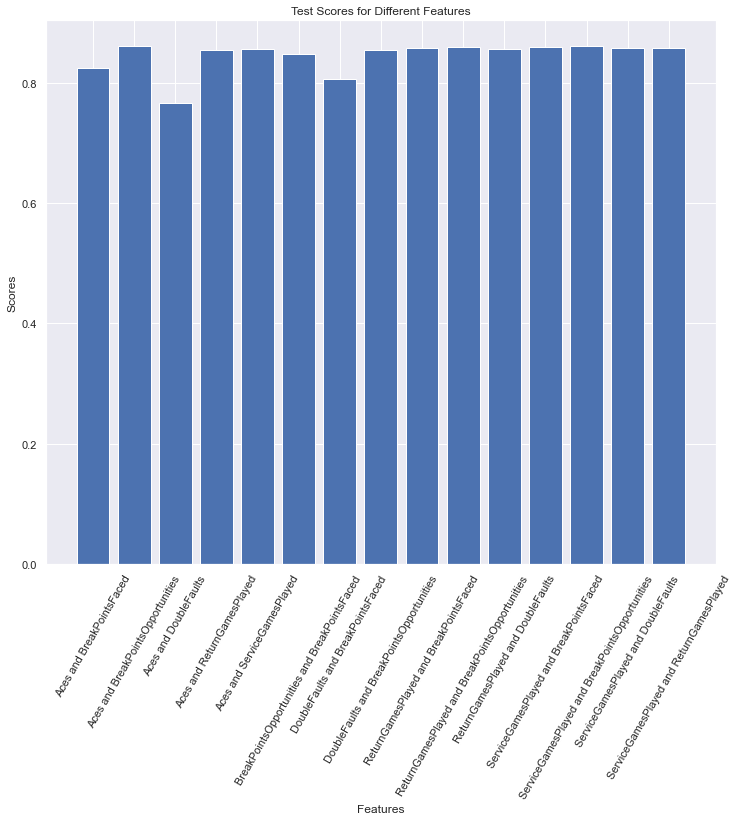

In [14]:
sns.set()
plt.figure(figsize=(12, 10))
x = [i for i in range(len(two_features))]
plt.bar(x, test_scores, tick_label = two_features)
plt.xticks(rotation=60)
plt.title('Test Scores for Different Features')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

The highest test score obtained when two features were used in predicting Winnings was **0.861** and the features responsible are **Aces and Break Point Opportunities**. Most other combinations also yielded high test scores. The lowest however was from a combination of **Aces and Double Faults** with a score of **0.767**

### Multiple Features to predict Winnings

In [15]:
# Function that creates a model that uses multiple features to predict winnings
def multiple_features(df, feature_list):
    x = df[feature_list]
    y = df[['Winnings']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print('Train Score for Multiple Features:', model.score(X_train, y_train))
    print('Test Score for Multiple Features:', model.score(X_test, y_test))
    y_predict = model.predict(X_test)

In [16]:
multiple_features(tennis, features_winnings)

Train Score for Multiple Features: 0.8333155782929988
Test Score for Multiple Features: 0.8701454560114648


The test score obtained when multiple features were used in predicting Winnings was **0.87**

In [17]:
# EXtracting all features from tennis dataframe
all_features_df = tennis.drop(columns = ['Player', 'Year', 'Wins', 'Losses', 'Winnings', 'Ranking'])
all_features_list = all_features_df.columns.to_list()

### All Features to predict Winnings

In [18]:
# Function that creates a model that all features to predict winnings
def all_features(feature_list):
    x = tennis[feature_list]
    y = tennis[['Winnings']]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
    model = LinearRegression()
    model.fit(X_train, y_train)
    print('Train Score for All Features:', model.score(X_train, y_train))
    print('Test Score for All Features:', model.score(X_test, y_test))
    y_predict = model.predict(X_test)
    plt.scatter(y_test, y_predict)
    plt.xlabel('Winnings')
    plt.ylabel('Predicted Winnings')
    plt.show()

Train Score for All Features: 0.8338826969309072
Test Score for All Features: 0.8702353880542221


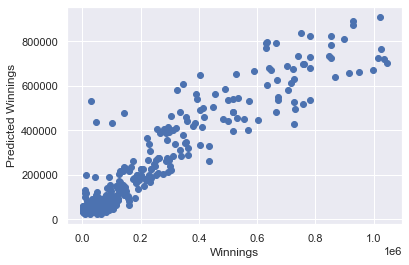

In [19]:
all_features(all_features_list)

The test score obtained when all features were used in predicting Winnings was **0.87**

The highest test score, **0.87** was when both multiple features and all features were selected in predicting the dependent variable, **Winnings**